In [1]:
from datasets.nuscenes import NuScenesDataset
from utils.filter import *
from glob import glob
import os
import numpy
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from modules.custom_networks import GenericInjection
import torchmetrics
from utils.filter import EllipseFilter
from glob import glob
from utils.utils import generate_model_from_config
import os
import cv2
from mmdet3d.apis import init_model, inference_detector

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
torch_geometric not installed


In [4]:
samples = glob("/media/wmg-5gcat/Co-op Autonomy 2/Hakan/custom_dataset/nus_centerpoint_activations_filtered_objects/train/features/*")
print(samples[:10])
data = torch.load(samples[0])

['/media/wmg-5gcat/Co-op Autonomy 2/Hakan/custom_dataset/nus_centerpoint_activations_filtered_objects/train/features/n008-2018-09-18-12-53-31-0400__LIDAR_TOP__1537289745450320.pt', '/media/wmg-5gcat/Co-op Autonomy 2/Hakan/custom_dataset/nus_centerpoint_activations_filtered_objects/train/features/n015-2018-10-08-15-52-24+0800__LIDAR_TOP__1538985234298196.pt', '/media/wmg-5gcat/Co-op Autonomy 2/Hakan/custom_dataset/nus_centerpoint_activations_filtered_objects/train/features/n008-2018-07-27-12-07-38-0400__LIDAR_TOP__1532708325947016.pt', '/media/wmg-5gcat/Co-op Autonomy 2/Hakan/custom_dataset/nus_centerpoint_activations_filtered_objects/train/features/n008-2018-08-30-15-16-55-0400__LIDAR_TOP__1535656921798928.pt', '/media/wmg-5gcat/Co-op Autonomy 2/Hakan/custom_dataset/nus_centerpoint_activations_filtered_objects/train/features/n015-2018-10-08-15-52-24+0800__LIDAR_TOP__1538985541297854.pt', '/media/wmg-5gcat/Co-op Autonomy 2/Hakan/custom_dataset/nus_centerpoint_activations_filtered_object

In [12]:
npt = data[1].detach().cpu().numpy()
print(npt.shape)
chwisemax = np.max(npt, axis=0)


(128, 180, 180)


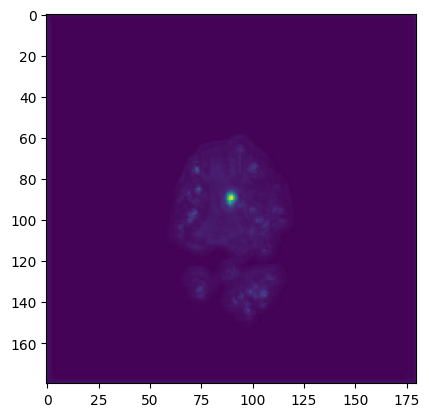

In [14]:
#plot max
plt.imshow(chwisemax)

In [7]:
import pickle
with open('early_sparisty.pkl', 'rb') as f:
    early = pickle.load(f)
with open('mid_sparisty.pkl', 'rb') as f:
    mid = pickle.load(f)
with open('late_sparisty.pkl', 'rb') as f:
    late = pickle.load(f)

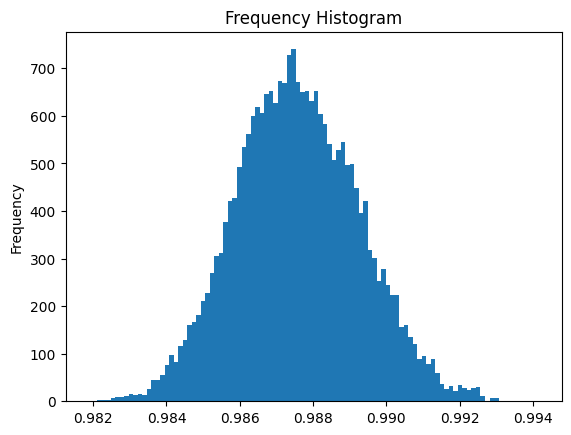

In [10]:
arr = np.array(early)
#Plot histogram
import matplotlib.pyplot as plt
plt.hist(arr, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
plt.show()

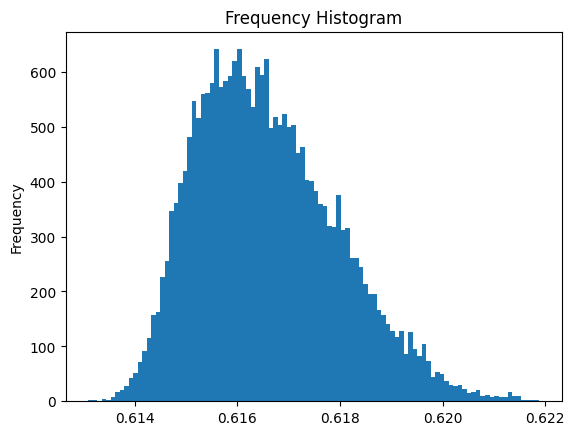

In [9]:
arr = np.array(mid)
#Plot histogram
import matplotlib.pyplot as plt
plt.hist(arr, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
plt.show()

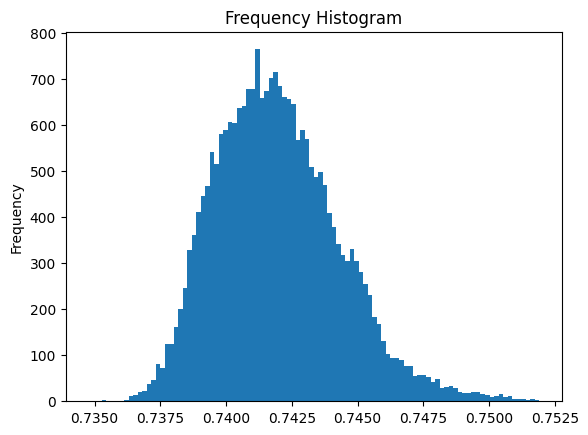

In [8]:
arr = np.array(late)
#Plot histogram
import matplotlib.pyplot as plt
plt.hist(arr, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
plt.show()

In [2]:
# det_model_checkpoint = r'/mnt/ssd2/mmdetection3d/ckpts/centerpoint_0075voxel_second_secfpn_dcn_circlenms_4x8_cyclic_20e_nus_20220810_025930-657f67e0.pth'
det_model_checkpoint = r'/home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/mmdetection3d/ckpts/centerpoint_0075voxel_second_secfpn_dcn_circlenms_4x8_cyclic_20e_nus_20220810_025930-657f67e0.pth'
# det_model_config= r'/mnt/ssd2/mmdetection3d/configs/centerpoint/centerpoint_voxel0075_second_secfpn_head-dcn-circlenms_8xb4-cyclic-20e_nus-3d.py'
det_model_config= r'/home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/mmdetection3d/configs/centerpoint/centerpoint_voxel0075_second_secfpn_head-dcn-circlenms_8xb4-cyclic-20e_nus-3d.py'
det_model = init_model(det_model_config, det_model_checkpoint, device='cuda:0')

Loads checkpoint by local backend from path: /home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/mmdetection3d/ckpts/centerpoint_0075voxel_second_secfpn_dcn_circlenms_4x8_cyclic_20e_nus_20220810_025930-657f67e0.pth
07/08 15:40:07 - mmengine - INFO - DeformConv2dPack pts_bbox_head.task_heads.0.feature_adapt_cls is upgraded to version 2.
07/08 15:40:07 - mmengine - INFO - DeformConv2dPack pts_bbox_head.task_heads.0.feature_adapt_reg is upgraded to version 2.
07/08 15:40:07 - mmengine - INFO - DeformConv2dPack pts_bbox_head.task_heads.1.feature_adapt_cls is upgraded to version 2.
07/08 15:40:07 - mmengine - INFO - DeformConv2dPack pts_bbox_head.task_heads.1.feature_adapt_reg is upgraded to version 2.
07/08 15:40:07 - mmengine - INFO - DeformConv2dPack pts_bbox_head.task_heads.2.feature_adapt_cls is upgraded to version 2.
07/08 15:40:07 - mmengine - INFO - DeformConv2dPack pts_bbox_head.task_heads.2.feature_adapt_reg is upgraded to version 2.
07/08 15:40:07 - mmengine - INFO - DeformConv2d

In [3]:
dataset_config = {
    'name': 'NuScenesDataset',
    'root_dir': '/media/ssd_reza/nuscenes/',
    'version': 'v1.0-trainval',
    'process': False,
    'filter_labels_only': False,
    'save_path': '/media/wmg-5gcat/Co-op Autonomy 2/Hakan',
    'save_filename': 'nuscenes_train_fix.pkl',
    'filtering_style': 'FilterType.ELLIPSE',
    'filter_params': {
      'a': 15,
      'b': 25,
      'offset': -10,
      'axis': 1}}
nus = NuScenesDataset(**dataset_config) 

Filtering style FilterType.ELLIPSE
Loading dataset from file
Loaded dataset with 23923 samples, dict_keys(['path', 'label', 'sample_token'])


In [12]:
data = nus[300]
cloud = data.get('pointcloud')
labels = data.get('labels')
print(len(labels))

9


In [13]:
activation_list = []
def register_activation_output(module, input, output):
    # print(output[0].shape,output[1].shape)
    # print(len(output))
    last_output = output.detach().cpu().numpy() #TODO: generalize this
    # print("Last output shape",last_output.shape)
    # print(last_output.shape)
    # print("-------------------")
    last_output = np.squeeze(last_output)
    activation_list.append(last_output)

def register_activation_input(module, input, output):
    # print(output[0].shape,output[1].shape)
    last_output = input[0].detach().cpu().numpy() #TODO: generalize this
    # print("Last output shape",last_output.shape)
    last_output = np.squeeze(last_output)
    activation_list.append(last_output)

In [24]:
h1 = det_model.pts_backbone.blocks._modules['0'].register_forward_hook(register_activation_input)
h2 = det_model.pts_backbone.blocks._modules['1'].register_forward_hook(register_activation_input)
h3 = det_model.pts_backbone.blocks._modules['1'].register_forward_hook(register_activation_output)

In [28]:
cloud.points.shape

(31066, 5)

In [36]:
cloud_tensor = torch.from_numpy(cloud.points).unsqueeze(0).to('cuda:0')


/home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/mmdetection3d/mmdet3d/models/task_modules/coders/centerpoint_bbox_coders.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.post_center_range = torch.tensor(
/home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/mmdetection3d/mmdet3d/models/task_modules/coders/centerpoint_bbox_coders.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.post_center_range = torch.tensor(


In [45]:
from tqdm.auto import tqdm
e_sp = []
m_sp = []
l_sp = []
def calculate_sparsity():
    early = activation_list[0]
    mid = activation_list[1]
    late = activation_list[2]
    #Calculate number of zeros 
    early_zeros = np.sum(early==0)
    mid_zeros = np.sum(mid==0)
    late_zeros = np.sum(late==0)
    #number of units in layers 
    early_units = np.prod(early.shape)
    mid_units = np.prod(mid.shape)
    late_units = np.prod(late.shape)
    #calculate sparsity
    early_sparsity = early_zeros/early_units
    mid_sparsity = mid_zeros/mid_units
    late_sparsity = late_zeros/late_units
    e_sp.append(early_sparsity)
    m_sp.append(mid_sparsity)
    l_sp.append(late_sparsity)
length = len(nus)
with tqdm(total=length) as pbar:
    for i in range(length):
        data = nus[i]
        cloud = data.get('pointcloud')
        labels = data.get('labels')
        with torch.no_grad():
            result = inference_detector(det_model,cloud.points)
        calculate_sparsity()
        pbar.update(1)
        activation_list = []

  0%|          | 0/23923 [00:00<?, ?it/s]

/home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/mmdetection3d/mmdet3d/models/task_modules/coders/centerpoint_bbox_coders.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.post_center_range = torch.tensor(


KeyboardInterrupt: 

In [38]:
len(activation_list)

3

In [39]:
early = activation_list[0]
mid = activation_list[1]
late = activation_list[2]

In [40]:
#Calculate number of zeros 
early_zeros = np.sum(early==0)
mid_zeros = np.sum(mid==0)
late_zeros = np.sum(late==0)
#number of units in layers 
early_units = np.prod(early.shape)
mid_units = np.prod(mid.shape)
late_units = np.prod(late.shape)
#calculate sparsity
early_sparsity = early_zeros/early_units
mid_sparsity = mid_zeros/mid_units
late_sparsity = late_zeros/late_units
print("Early Sparsity: ",early_sparsity)
print("Mid Sparsity: ",mid_sparsity)
print("Late Sparsity: ",late_sparsity)

Early Sparsity:  0.9857792004243827
Mid Sparsity:  0.6153580729166667
Late Sparsity:  0.7413069058641976


In [43]:
#Convert early to sparse tensor
early_tensor = torch.from_numpy(early).to('cuda:0')
sparse_early= early_tensor.to_sparse()
torch.save(sparse_early, 'sparse_early.pt')
torch.save(early_tensor, 'early.pt')

In [32]:
data.get('file_name')

'/mnt/ssd2/nuscenes/samples/LIDAR_TOP/n015-2018-07-27-11-36-48+0800__LIDAR_TOP__1532662710449126.pcd.bin'

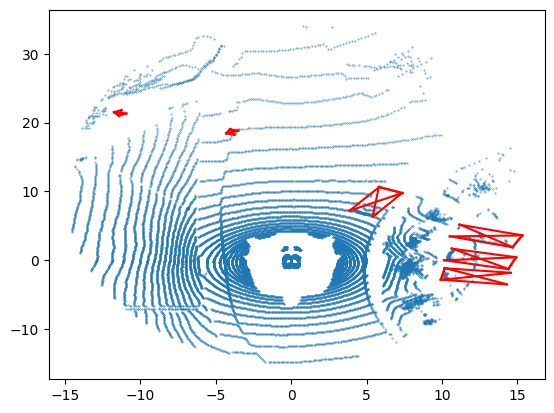

In [33]:
#top view plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cloud.points[:,0], cloud.points[:,1], s=0.1)
#plot boxes top view
for label in labels:
    box = label.corners
    top_corners = box[:, :2]  # Extracting the top view (XY plane)
    
    # Create a loop to connect the corners of the bounding box
    for i in range(4):
        start = top_corners[i]
        end = top_corners[(i + 1) % 4]
        ax.plot([start[0], end[0]], [start[1], end[1]], 'r')

    # Connect the top and bottom faces of the bounding box
    for i in range(4, 8):
        start = top_corners[i - 4]
        end = top_corners[(i + 1) % 4 + 4]
        ax.plot([start[0], end[0]], [start[1], end[1]], 'r')
plt.show()

In [7]:
myObj_Filter=  ObjectFilter()

In [8]:
cloud

In [34]:
res = myObj_Filter.filter_pointcloud(data=cloud,bounding_boxes=labels)

In [35]:
res.shape

(27332, 5)

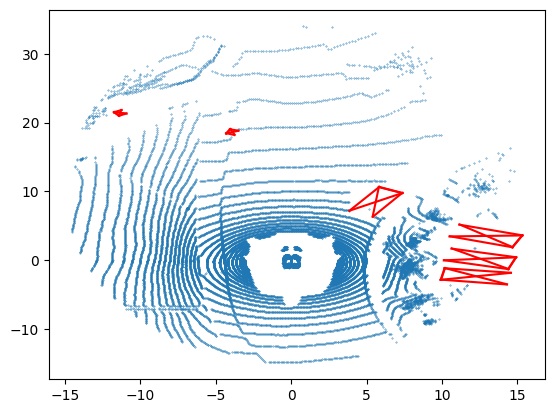

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(res[:,0], res[:,1], s=0.1)
for label in labels:
    box = label.corners
    top_corners = box[:, :2]  # Extracting the top view (XY plane)
    
    # Create a loop to connect the corners of the bounding box
    for i in range(4):
        start = top_corners[i]
        end = top_corners[(i + 1) % 4]
        ax.plot([start[0], end[0]], [start[1], end[1]], 'r')

    # Connect the top and bottom faces of the bounding box
    for i in range(4, 8):
        start = top_corners[i - 4]
        end = top_corners[(i + 1) % 4 + 4]
        ax.plot([start[0], end[0]], [start[1], end[1]], 'r')
plt.show()